In [1]:
# import required libraries for dataset

import numpy, pandas, matplotlib, seaborn

In [4]:
# Let's load the dataset

data = pandas.read_csv('/content/india_job_market_dataset.csv', encoding = 'ascii')
print(data)

         Job ID             Job Title Company Name Job Location    Job Type  \
0          JOB1     Software Engineer       Amazon    Ahmedabad   Full-time   
1          JOB2   Marketing Executive      Infosys    Ahmedabad  Internship   
2          JOB3     Financial Analyst     Deloitte       Jaipur    Contract   
3          JOB4      Business Analyst       Amazon        Delhi   Full-time   
4          JOB5     Software Engineer      Infosys        Delhi   Full-time   
...         ...                   ...          ...          ...         ...   
19995  JOB19996   Marketing Executive     Deloitte         Pune   Full-time   
19996  JOB19997      Business Analyst    Accenture    Bangalore  Internship   
19997  JOB19998      Graphic Designer        Wipro       Jaipur   Part-time   
19998  JOB19999  Sales Representative      Infosys      Kolkata  Internship   
19999  JOB20000      Business Analyst    Accenture       Mumbai   Part-time   

      Salary Range Experience Required Posted Date 

In [5]:
# let's see the basic information about the dataset to understand its structure

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Job ID                 20000 non-null  object
 1   Job Title              20000 non-null  object
 2   Company Name           20000 non-null  object
 3   Job Location           20000 non-null  object
 4   Job Type               20000 non-null  object
 5   Salary Range           20000 non-null  object
 6   Experience Required    20000 non-null  object
 7   Posted Date            20000 non-null  object
 8   Application Deadline   20000 non-null  object
 9   Job Portal             20000 non-null  object
 10  Number of Applicants   20000 non-null  int64 
 11  Education Requirement  20000 non-null  object
 12  Skills Required        20000 non-null  object
 13  Remote/Onsite          20000 non-null  object
 14  Company Size           20000 non-null  object
dtypes: int64(1), object

In [10]:
# Let's get the insights from the dataset.

# 1.What are the top 3 job titles with the highest number of postings?

top_job_titles = data['Job Title'].value_counts().head(3)
print(top_job_titles)

# Tip: This question tests your ability to find and rank the most in-demand job roles, which is crucial for understanding market demand#.



Job Title
Cyber Security Analyst    2085
Marketing Executive       2036
Graphic Designer          2013
Name: count, dtype: int64


In [15]:
# 2. Which company has the highest number of job postings, and how many?

company_with_most_jobs = data['Company Name'].value_counts().idxmax()
number_of_jobs = data['Company Name'].value_counts().max()
print(f"The company with the highest number of job postings is '{company_with_most_jobs}' with {number_of_jobs} job postings.")

# Tip: This assesses how well you can summarize company-level data to identify hiring trends for a specific company.


The company with the highest number of job postings is 'Amazon' with 2086 job postings.


In [16]:
# 3. What is the most common salary range offered, and how many jobs fall into that range?

most_common_salary = data['Salary Range'].value_counts().idxmax()
most_common_salary_count = data['Salary Range'].value_counts().max()
print(f"The most common salary range is {most_common_salary}, with {most_common_salary_count} jobs.")

# Tip: Understanding salary trends helps you assess whether the compensation aligns with industry standards or candidate expectations.

The most common salary range is 12-20 LPA, with 4066 jobs.


In [21]:
# 4. What percentage of job postings are remote, onsite, or hybrid?

work_type_percent = data['Remote/Onsite'].value_counts(normalize=True) * 100
print(work_type_percent)

# Tip: This question evaluates your ability to calculate percentages and understand trends in work flexibility.



Remote/Onsite
Remote    33.710
Onsite    33.485
Hybrid    32.805
Name: proportion, dtype: float64


In [25]:
# 5. What are the top 7 skills in demand?

skills_list = data['Skills Required'].str.split(',').explode().str.strip()
top_skills = skills_list.value_counts().head(7)
print(top_skills)

# Tip: This highlights the technical and analytical skills most sought after in the job market, critical for recruitment and training.

Skills Required
UI/UX     6138
Python    6134
Java      6103
React     6073
C++       5993
SQL       5953
Excel     5951
Name: count, dtype: int64


In [26]:
# Assuming 'data' is your DataFrame containing the 'Skills Required' column

# Split and explode the skills list
skills_list = data['Skills Required'].str.split(',').explode().str.strip()

# Filter for only Python and SQL
filtered_skills = skills_list[skills_list.isin(['Python', 'SQL'])]

# Count the occurrences of Python and SQL
top_skills = filtered_skills.value_counts()

# Print the results
print(top_skills)

Skills Required
Python    6134
SQL       5953
Name: count, dtype: int64


In [27]:
# 6. which location has more job postings? How many?

top_location = data['Job Location'].value_counts().idxmax()
top_location_count = data['Job Location'].value_counts().max()
print(f"{top_location} has the most job postings with {top_location_count} listings.")

# Tip: This helps analyze regional hiring trends, aiding in workforce planning or relocation decisions.


Hyderabad has the most job postings with 2055 listings.


In [28]:
# 7. What is the average number of applicants per job?

average_applicants = data['Number of Applicants'].mean()
print(f"The average number of applicants per job is {average_applicants:.2f}.")

# Tip: This provides insight into job competitiveness and helps in understanding market demand for positions.

The average number of applicants per job is 256.72.


In [29]:
# 8. How many jobs require a bachelor's degree or higher?

bachelors_or_higher = data[data['Education Requirement'].str.contains("B.Sc|B.Tech|MBA|M.Tech|PhD", na=False)].shape[0]
print(f"There are {bachelors_or_higher} jobs requiring a bachelor's degree or higher.")

#Tip: Educational requirements help assess the skill and qualification levels companies are seeking.



There are 20000 jobs requiring a bachelor's degree or higher.


In [30]:
# 9. What are the most common experience requirements?

experience_distribution = data['Experience Required'].value_counts()
print(experience_distribution)

#Tip: Experience analysis helps determine whether the job market is more favorable for entry-level or senior professionals.


Experience Required
10+ years     5069
2-5 years     5003
0-2 years     4980
5-10 years    4948
Name: count, dtype: int64


In [31]:
# 10. What is the range of the number of applicants per job (min and max)?

min_applicants = data['Number of Applicants'].min()
max_applicants = data['Number of Applicants'].max()
print(f"The range of applicants per job is from {min_applicants} to {max_applicants}.")

# Tip: This measures variability in job interest and helps analyze the popularity of certain job types.



The range of applicants per job is from 10 to 500.


In [32]:
# 11. What proportion of job postings offer salaries above ₹12 LPA?

high_salary_jobs = data[data['Salary Range'].str.contains("12-20|20+", na=False)].shape[0]
high_salary_percentage = (high_salary_jobs / data.shape[0]) * 100
print(f"{high_salary_percentage:.2f}% of job postings offer salaries above ₹12 LPA.")

# Tip: Salary segmentation helps understand compensation distribution across roles.



40.17% of job postings offer salaries above ₹12 LPA.


In [33]:
# 12. Which skills are most common for jobs offering ₹20+ LPA?

high_salary_jobs = data[data['Salary Range'] == '20+ LPA']
high_salary_skills = high_salary_jobs['Skills Required'].str.split(',').explode().str.strip().value_counts().head(7)
print(high_salary_skills)


Skills Required
UI/UX               1240
Java                1224
Python              1221
React               1208
Machine Learning    1205
AWS                 1197
C++                 1173
Name: count, dtype: int64


<ipython-input-36-e3854b7319ae>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette="rocket")


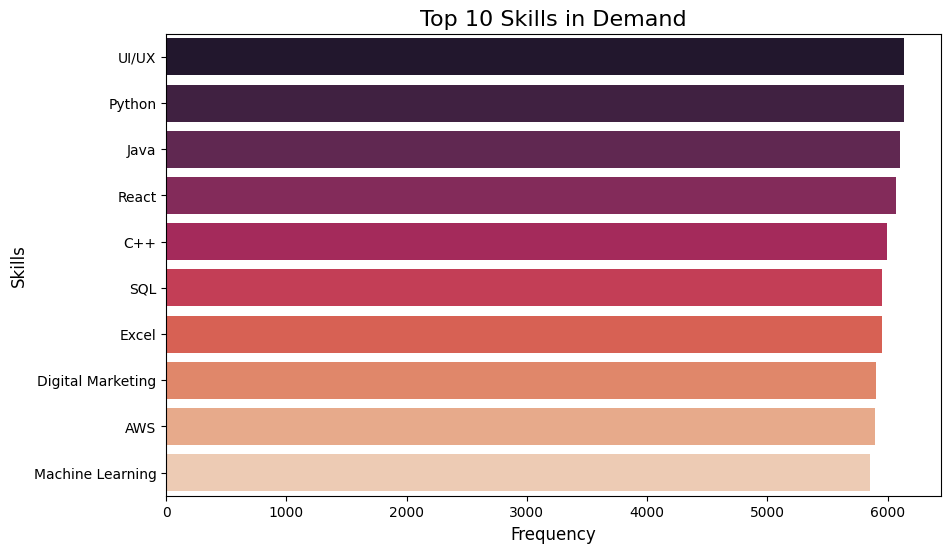

In [36]:
# Now, Below are the most insightful questions from the dataset, with corresponding visualizations designed to clearly communicate key findings.

# 13. Top Skills in Demand

import matplotlib.pyplot as plt
import seaborn as sns

skills_list = data['Skills Required'].str.split(',').explode().str.strip()
top_skills = skills_list.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette="rocket")
plt.title("Top 10 Skills in Demand", fontsize=16)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()

# Why: Skills are critical for job seekers and employers. Highlighting the top skills gives immediate value to both parties.
# Visualization: Horizontal bar chart of the top 10 skills.


<ipython-input-37-e7b2bf9ea976>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="mako")


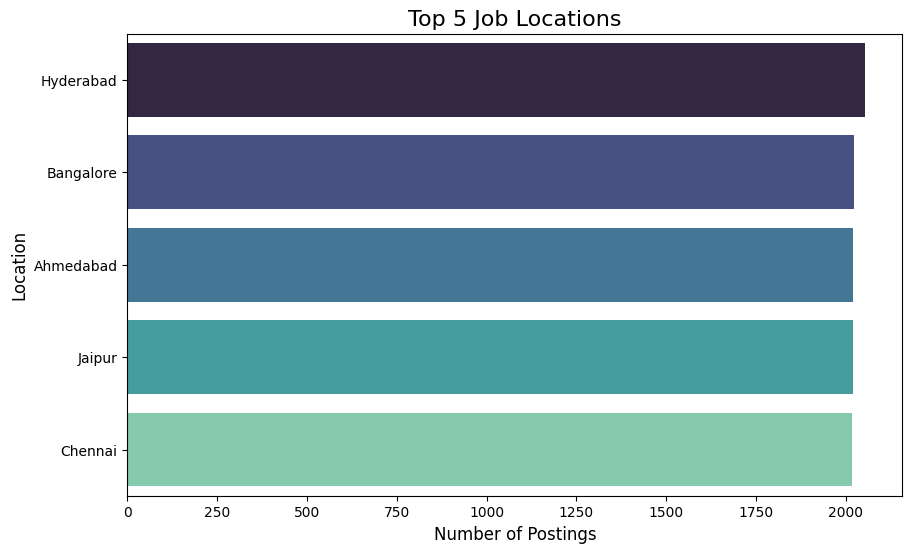

In [37]:
# 14. 3. Job Location Insights

top_locations = data['Job Location'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="mako")
plt.title("Top 5 Job Locations", fontsize=16)
plt.xlabel("Number of Postings", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.show()

# Why: Job location preferences help users identify opportunities in their region or decide on relocation.
# Visualization: Horizontal bar chart of the top 5 cities with the most job postings.


<ipython-input-38-93e784461139>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_distribution.values, y=salary_distribution.index, palette="viridis")


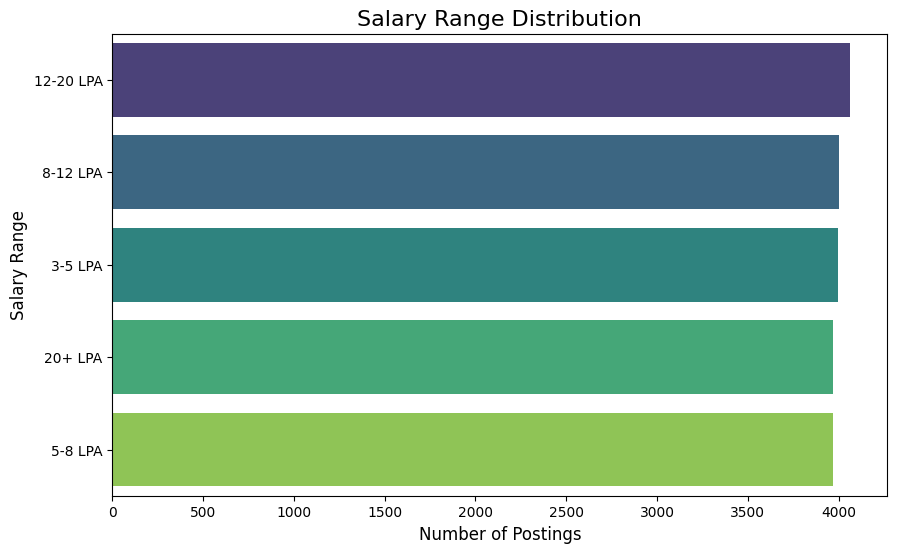

In [38]:
# 15.Salary Range Distribution

salary_distribution = data['Salary Range'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=salary_distribution.values, y=salary_distribution.index, palette="viridis")
plt.title("Salary Range Distribution", fontsize=16)
plt.xlabel("Number of Postings", fontsize=12)
plt.ylabel("Salary Range", fontsize=12)
plt.show()

# Why: Salary trends help users understand compensation benchmarks.
# Visualization: Bar chart showing the frequency of different salary ranges.


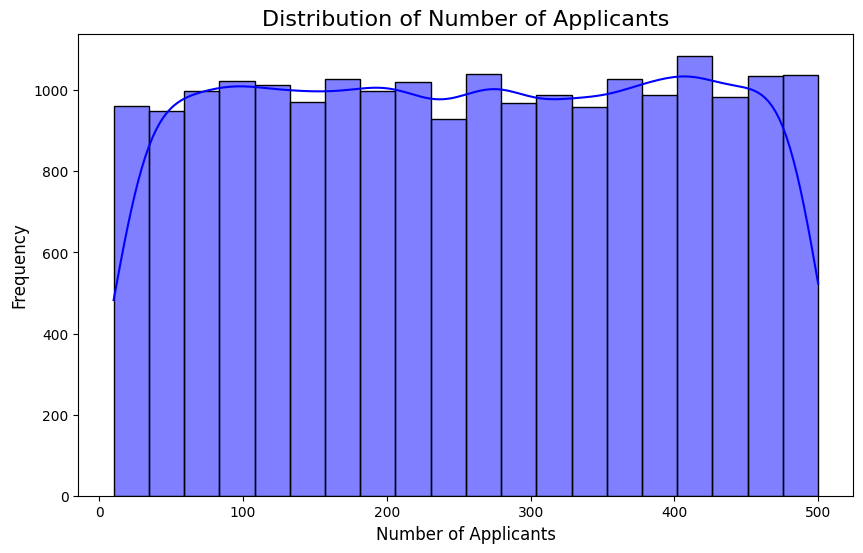

In [39]:
# 16.Number of Applicants Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Number of Applicants'], kde=True, bins=20, color='blue')
plt.title("Distribution of Number of Applicants", fontsize=16)
plt.xlabel("Number of Applicants", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Why: Helps users understand competition for jobs and whether they're applying for highly competitive roles.
# Visualization: Histogram of the number of applicants.


<ipython-input-40-f773840ec600>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=experience_distribution.values, y=experience_distribution.index, palette="coolwarm")


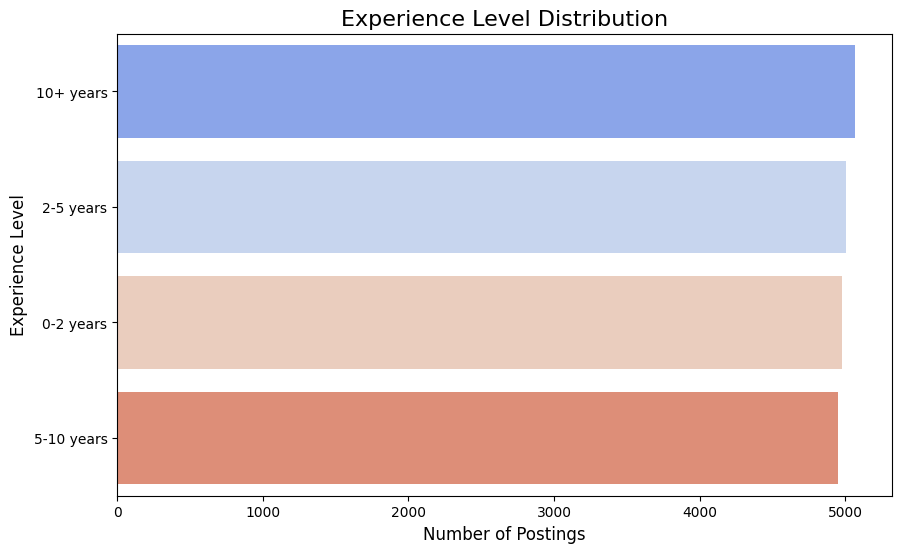

In [40]:
#17.Experience Level Requirements

experience_distribution = data['Experience Required'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=experience_distribution.values, y=experience_distribution.index, palette="coolwarm")
plt.title("Experience Level Distribution", fontsize=16)
plt.xlabel("Number of Postings", fontsize=12)
plt.ylabel("Experience Level", fontsize=12)
plt.show()

#Why: Helps job seekers identify roles suitable for their experience level.
#Visualization: Bar chart of experience level distribution.


<ipython-input-41-fe654bb1b46b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_distribution.values, y=education_distribution.index, palette="cubehelix")


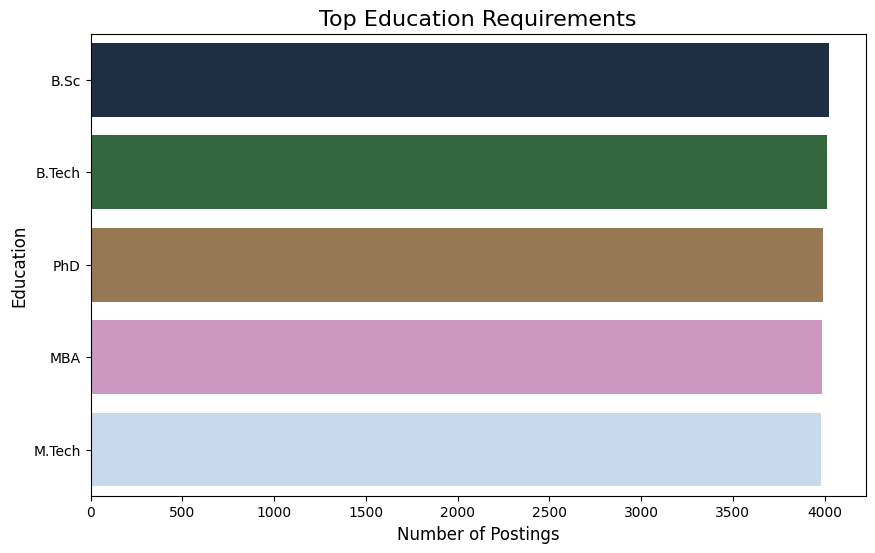

In [41]:
#18. Education Requirements

education_distribution = data['Education Requirement'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=education_distribution.values, y=education_distribution.index, palette="cubehelix")
plt.title("Top Education Requirements", fontsize=16)
plt.xlabel("Number of Postings", fontsize=12)
plt.ylabel("Education", fontsize=12)
plt.show()

# Why: Education level analysis highlights qualifications necessary for jobs.
# Visualization: Horizontal bar chart of the top 5 education requirements.

# Conclusion:

1. Analyze data using Pandas.
2. Extract meaningful insights from complex datasets.
3. Present findings in a clear and practical manner.

# Recommendations:

1. Use Top Skills and Experience Requirements to align your resume or upskill.
2. Leverage Work Type Distribution and Job Location Insights to focus on flexible roles or specific regions.
3. Refer to Salary Range Distribution to negotiate or target suitable roles.
4. Analyze Applicants Distribution to identify less competitive roles.

Relax, You've done a great job.